In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
cols = ['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp',
'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets','Total Length of Fwd Packets', 'Total Length of Bwd Packets',
'Fwd Packet Length Max', 'Fwd Packet Length Min','Fwd Packet Length Mean''Fwd Packet Length Std', 'Bwd Packet Length Max',
'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean',
'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size',
'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk','Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
'Active Mean', 'Active Std', 'Active Max', 'Active Min','Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min','SimillarHTTP',
'Inbound', 'Label']

In [22]:
dataset = pd.read_csv('../data/external/DrDoS_DNS.csv', names = cols, skiprows = 1).drop(['Unnamed: 0'], axis = 1)
dataset

C:\Users\hadyo\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
425,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,0,42680.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
430,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,0,880.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
1654,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,0,88000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2927,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,0,88000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
694,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,0,88000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,172.16.0.5,900,192.168.50.1,23579,17,2018-12-01 11:22:40.253588,1,2,0,2944.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
5576,172.16.0.5,900,192.168.50.1,54596,17,2018-12-01 11:22:40.253659,30,2,0,2944.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
26506,172.16.0.5,900,192.168.50.1,14341,17,2018-12-01 11:22:40.253852,1,2,0,2944.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
18736,172.16.0.5,900,192.168.50.1,46229,17,2018-12-01 11:22:40.254534,1,2,0,2944.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [23]:
dataset.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp'], axis = 1, inplace = True)

### Describe dataset

In [24]:
dataset.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length MeanFwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,...,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06
mean,6.013596e+00,8.004867e-03,2.952438e+03,6.768139e+00,1.377942e+03,1.377609e+03,1.377831e+03,7.593553e-02,2.484989e-01,2.243609e-02,...,-3.680966e+07,6.703219e+01,1.305199e+01,8.437979e+01,5.788418e+01,2.331791e+03,1.054355e+02,2.420004e+03,2.240776e+03,9.990669e-01
std,5.953501e+02,2.950822e+00,9.122037e+03,6.837585e+03,2.999557e+02,3.004828e+02,2.996888e+02,5.349133e+00,2.987653e+01,1.735238e+00,...,1.943476e+08,2.653840e+04,6.162152e+03,2.883959e+04,2.557915e+04,3.318188e+05,4.571781e+04,3.434159e+05,3.242934e+05,3.053264e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,2.928000e+03,0.000000e+00,1.464000e+03,1.464000e+03,1.464000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+00,0.000000e+00,2.944000e+03,0.000000e+00,1.472000e+03,1.472000e+03,1.472000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.000000e+00,0.000000e+00,2.944000e+03,0.000000e+00,1.472000e+03,1.472000e+03,1.472000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.001480e+05,4.602000e+03,1.526642e+07,1.099376e+07,3.212000e+04,2.020000e+03,3.015291e+03,2.221556e+03,3.358000e+04,1.072000e+03,...,1.480000e+03,4.872242e+07,7.827056e+06,4.872242e+07,4.872242e+07,1.017888e+08,6.600292e+07,1.037700e+08,1.017888e+08,1.000000e+00


### check Null values

In [25]:
print(dataset.isnull().values.any())

True


In [26]:
dataset.columns[dataset.isnull().any()]

Index(['Flow Bytes/s'], dtype='object')

### Check Categorical

In [8]:
num_cols = dataset._get_numeric_data().columns
list(set(dataset.columns) - set(num_cols))

['SimillarHTTP', 'Label']

### Plot Data

In [9]:
dataset['SimillarHTTP'].dtype

dtype('O')

In [10]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
dataset['SimillarHTTP'] = encode.fit_transform(dataset['SimillarHTTP'].astype('|S')) # convert object type to string
dataset['Label'] = encode.fit_transform(dataset['Label'])

In [11]:
data_temp = dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
data_temp = dataset.dropna(inplace=True)
data_temp

In [13]:
tsne = TSNE(n_components=2, init='random', random_state = 0) # applying TSNE to obtain a 2d data
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.dropna(inplace=True)
data_plot = tsne.fit_transform(dataset)
plt.plot(data_plot)
plt.show()

### Check Imbalance

1    4908665
0       3354
Name: Label, dtype: int64


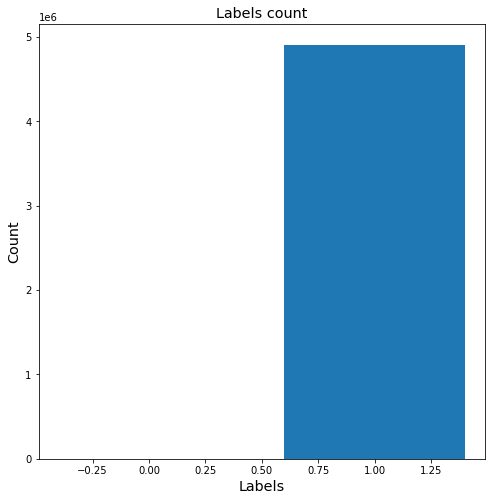

In [14]:
print(dataset['Label'].value_counts())
fig, ax = plt.subplots(figsize=(8, 8))
plt.bar(dataset['Label'].unique(), dataset['Label'].value_counts())
plt.title('Labels count', fontsize = 'x-large')
plt.ylabel('Count', fontsize = 'x-large')
plt.xlabel('Labels', fontsize = 'x-large')
plt.show()

### Profiling

In [15]:
sample = dataset.sample(frac=0.005)

In [19]:
from pandas_profiling import ProfileReport
from ipywidgets import HTML, Button, widgets
profile = ProfileReport(sample, title="Pandas Profiling Report")

In [ ]:
profile.to_widgets()

### check data type

In [17]:
dtype_df = dataset.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int32,1
1,int64,33
2,float64,45


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4912019 entries, 425 to 2811
Data columns (total 79 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Flow Duration                                int64  
 1   Total Fwd Packets                            int64  
 2   Total Backward Packets                       float64
 3   Total Length of Fwd Packets                  float64
 4   Total Length of Bwd Packets                  float64
 5   Fwd Packet Length Max                        float64
 6   Fwd Packet Length Min                        float64
 7   Fwd Packet Length MeanFwd Packet Length Std  float64
 8   Bwd Packet Length Max                        float64
 9   Bwd Packet Length Min                        float64
 10  Bwd Packet Length Mean                       float64
 11  Bwd Packet Length Std                        float64
 12  Flow Bytes/s                                 float64
 13  Flow Packets/

### check suspicious data (columns with only one value)

In [20]:
suspiciousData = []

for col in dataset:
    
    if len(dataset[col].unique()) == 1:
        suspiciousData.append(col)
dataset[suspiciousData].describe()

,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Count,PSH Flag Count,ECE Flag Count,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate
count,4912019.0,4912019.0,4912019.0,4912019.0,4912019.0,4912019.0,4912019.0,4912019.0,4912019.0,4912019.0,4912019.0,4912019.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
benign = dataset_2[dataset_2['Label'] == 0]
ddos = dataset_2[dataset_2['Label'] == 1]

In [ ]:
# benign.to_csv('benign.csv',index=False)
# ddos.to_csv('malicious_ddos.csv',index=False)
